In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1596, 12)

In [5]:
data["quality"]  # Dependent variable
# or data.quality (same as above code)
data.quality.unique()
data.quality.value_counts() # Gives value counts for later analysis for why model works the way it does
# Lower count numbers could become outliers(In this case, quality values of 4, 8 and 3)

5    680
6    637
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop("quality", axis = 1) # X equals all data except target variable
y = data.quality  # y equals target variable

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1276, 11)
(320, 11)
(1276,)
(320,)


In [9]:
# Create linear regression model for comparison
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
y_test_pred = lm.predict(X_test)
y_test_pred

array([5.77919561, 5.51701753, 5.33155851, 6.39776458, 5.16864298,
       5.1387681 , 5.3213804 , 5.33155851, 5.73565546, 6.28386536,
       5.47663672, 5.85100221, 5.10092427, 5.59543582, 5.49913724,
       5.33804165, 5.37863088, 5.47755483, 4.8989854 , 5.09299791,
       6.13516703, 6.25085797, 6.54390699, 6.48565963, 4.93402045,
       5.55379904, 4.95441384, 5.27693768, 5.01697827, 5.78186255,
       5.13294351, 5.67281142, 5.34893993, 5.1497423 , 5.75846024,
       5.58503798, 5.92679643, 5.6719115 , 5.55766407, 5.5013491 ,
       5.68192734, 4.95676408, 4.79776865, 6.03313065, 6.19462794,
       6.64110367, 5.12496712, 5.896918  , 5.32916895, 5.45808176,
       5.87254609, 6.34999999, 5.72581614, 5.43995834, 5.81024378,
       5.45315835, 5.48248516, 5.30554975, 5.09724341, 5.3383933 ,
       6.07991486, 5.11022658, 6.1391426 , 5.4196178 , 5.92642813,
       4.66375395, 5.26228259, 5.72608379, 6.41867883, 6.02215549,
       5.179136  , 5.17657179, 5.72384449, 5.89764149, 5.21656

In [11]:
# Import necessary packages (already done: sklearn linear_model)
logReg = linear_model.LogisticRegression()
logReg.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_test_pred = logReg.predict(X_test)
y_test_pred

array([6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6,

In [13]:
data_test_pred = pd.DataFrame(zip(y_test, y_test_pred), columns = ["actual", "predicted"])
data_test_pred.head()

,actual,predicted
0,5,6
1,6,5
2,5,5
3,6,6
4,5,5


In [14]:
# Comparing test numbers to predicted numbers for accuracy
# Import packages
import numpy as np
y_test == y_test_pred

1485    False
132     False
819      True
965      True
1302     True
        ...  
723      True
60       True
883     False
1581    False
218     False
Name: quality, Length: 320, dtype: bool

In [15]:
np.mean(y_test == y_test_pred) # How often model was correct

0.578125

In [16]:
print("Accuracy of the model:", np.mean(y_test == y_test_pred))

Accuracy of the model: 0.578125


In [17]:
# Confusion matrix
# Import package
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred)) #The error is called cross entropy
# Sigmoid is a function that decides which value to pass as output and what not to pass
# Sigmoid basically:
# Y1 = a1x1 + b1x2 + c1x3
# Y2 = a2x1 + b2x2 + c2x3
# Sigmoid:
# P1 = e^Y1/(e^Y1 + e^Y2)
# P2 = e^Y2/(e^Y1 + e^Y2)
# or P2 = 1 - P1
# Softmax is sigmoid for more than two categories

[[  0   0   1   1   0   0]
 [  0   0   9   2   0   0]
 [  0   0 108  34   0   0]
 [  0   0  51  76   0   0]
 [  0   0   2  31   1   0]
 [  0   0   0   4   0   0]]


In [18]:
# Find the intercepts
logReg.intercept_

array([ 0.00106507,  0.03172857,  0.50865471, -0.08293937, -0.39794337,
       -0.06056562])

In [19]:
# Find the coefficients
logReg.coef_

array([[ 8.53511134e-03,  1.21604202e-01, -3.04849191e-02,
        -9.48745830e-04,  1.12803795e-02, -5.96344983e-03,
        -1.57994685e-02,  1.45381740e-03,  2.70963079e-02,
        -2.85156260e-02, -1.72244867e-01],
       [-3.01786677e-01,  2.62702625e-01, -1.40134581e-01,
         3.08106168e-01, -8.56522957e-03, -5.25249081e-02,
         4.57967752e-03,  3.14999317e-02,  1.91822924e-01,
        -8.18286965e-02,  6.92541865e-02],
       [ 2.35006728e-01,  9.33534934e-01, -5.09008612e-01,
        -1.29520573e-01,  1.04228982e-01, -1.10790528e-02,
         2.90463788e-02,  5.06468399e-01,  1.79866974e+00,
        -3.83354169e-01, -7.48837560e-01],
       [ 1.27257230e-01, -3.38548067e-01,  8.37199496e-02,
        -1.88964606e-01, -2.40130535e-03,  1.81566073e-02,
         9.16699719e-03, -8.18336980e-02, -3.03235841e-01,
         2.01893175e-01,  1.99800490e-01],
       [ 9.75083504e-02, -8.75972232e-01,  5.24832705e-01,
         3.00849593e-03, -9.11627774e-02,  1.02402251e-02,
  

In [22]:
# Plot the model
import matplotlib.pyplot as plt
%matplotlib inline

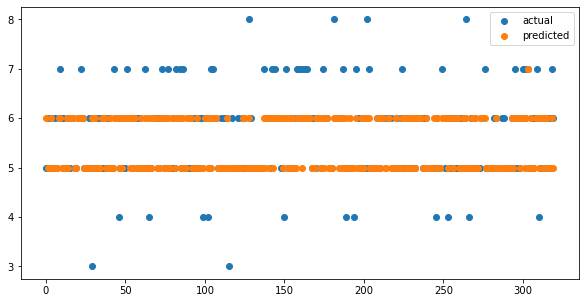

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(data_test_pred.index, data_test_pred.actual, label = "actual")
plt.scatter(data_test_pred.index, data_test_pred.predicted, label = "predicted")
plt.legend()